Mounting Data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"

Importing required Packages 

In [74]:

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

In [75]:
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import seaborn as sn
from scipy.stats import skew
from scipy.stats import kurtosis
import math
import time

In [77]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE

In [76]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

Installing Required Packages

In [ ]:
pip install attrdict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Change Location

In [78]:
os.chdir("/content/drive/MyDrive/FOREST_FIRES")
!ls 

 140.png
 141.png
 142.png
 143.png
 144.png
 145.png
 146.png
 147.png
 148.png
 149.png
 Algerian_forest_fires_dataset_UPDATE.csv
 Arch_diag_o.drawio
 Archie_Creek_Data.zip
 DATA.csv
 Data_himawari8
 dg1.png
 dg2.png
 dstrbn.png
 elt_jamo.gjam
 etldiag1.drawio.png
 fire_archive.csv
 fires_in_park_mnt.png
 inpt_fgr.png
 LINKS.txt
 map_mntsn.jfif
 notes.gdoc
 org_dataset.csv
 sample_opt.png
 The-map-of-the-Montesinho-natural-park.png
 ttl.gdoc
'Untitled Diagram.drawio'


Loading Dataset into PANDAS dataframe

In [79]:
data=pd.read_csv("org_dataset.csv")

Exploratory data Analysis:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
%matplotlib inline

In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
data.tail(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
502,4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0.00
503,2,4,aug,wed,94.5,139.4,689.1,20.0,29.2,30,4.9,0.0,1.95
504,4,3,aug,wed,94.5,139.4,689.1,20.0,28.9,29,4.9,0.0,49.59
505,1,2,aug,thu,91.0,163.2,744.4,10.1,26.7,35,1.8,0.0,5.80
506,1,2,aug,fri,91.0,166.9,752.6,7.1,18.5,73,8.5,0.0,0.00
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00


In [ ]:
data.head(15)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [ ]:
data.mean()

X          4.669246
Y          4.299807
month      7.475822
day        4.259188
FFMC      90.644681
DMC      110.872340
DC       547.940039
ISI        9.021663
temp      18.889168
RH        44.288201
wind       4.017602
rain       0.021663
area      12.847292
dtype: float64

In [ ]:
data.median()

X          4.00
Y          4.00
month      8.00
day        5.00
FFMC      91.60
DMC      108.30
DC       664.20
ISI        8.40
temp      19.30
RH        42.00
wind       4.00
rain       0.00
area       0.52
dtype: float64

In [ ]:
data.mode(axis=0)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,4.0,4.0,8.0,7.0,91.6,99.0,745.3,9.6,17.4,27.0,2.2,0.0,0.0
1,NaN,NaN,NaN,NaN,92.1,NaN,NaN,NaN,19.6,NaN,3.1,NaN,NaN


In [ ]:
data.shape

(517, 13)

Checking For Null Values

In [ ]:
data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [ ]:
print('Minimum Burnt Area: ', data['area'].min())
print('Maximum Burnt Area: ', data['area'].max())

Minimum Burnt Area:  0.0
Maximum Burnt Area:  1090.84


In [80]:
def func(ar):
  l=[]
  for i in ar:
    if i!=0:
      l.append(1)
    else:
      l.append(0)
  return l

In [81]:
arr=data['area']
#print(type(arr))
li=func(arr)
srs=pd.Series(li)

In [ ]:
for i in range(len(srs)):
  print(srs[i],arr[i])

In [ ]:
print("Data Types:", data.dtypes)

Data Types: X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object


**FFMC : Fine Fuel Moisture Code
DMC  : Duff Moisture Code 
DC   : Drought Code**

In [ ]:
dfs_skw=data.drop(['X', 'Y','day','month','Y/N'], axis=1)
print("\t\t    Skewness Of Different Attributes\t\t")
print("\t\tSkewness Of FFMC:",skew(dfs_skw['FFMC'], axis=0, bias=True))
print("\t\tSkewness Of DMC:",skew(dfs_skw['DMC'], axis=0, bias=True))
print("\t\tSkewness Of DC:",skew(dfs_skw['DC'], axis=0, bias=True))
#print("\t\tSkewness Of ISI:",skew(dfs_skw['ISI'], axis=0, bias=True))
print("\t\t    Kurtosis Value Of Different Attributes\t\t")
print("\t\tKurtosis Of FFMC:",skew(dfs_skw['FFMC'], axis=0, bias=True))
print("\t\tKurtosis Of DMC:",skew(dfs_skw['DMC'], axis=0, bias=True))
print("\t\tKurtosis Of DC:",skew(dfs_skw['DC'], axis=0, bias=True))

		    Skewness Of Different Attributes		
		Skewness Of FFMC: -6.556512420159405
		Skewness Of DMC: 0.5459080276432966
		Skewness Of DC: -1.097249767086751
		    Kurtosis Value Of Different Attributes		
		Kurtosis Of FFMC: -6.556512420159405
		Kurtosis Of DMC: 0.5459080276432966
		Kurtosis Of DC: -1.097249767086751


Adding A new Column Indicating whether a fire has occured or not

In [82]:
data["Y/N"]=srs

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Y/N
0,7,5,3,6,0.870968,0.086492,0.101325,0.090909,8.2,0.423529,6.7,0.0,0.0,0
1,7,4,10,3,0.927742,0.118194,0.775419,0.119430,18.0,0.211765,0.9,0.0,0.0,0
2,7,4,10,7,0.927742,0.146795,0.796294,0.119430,14.6,0.211765,1.3,0.0,0.0,0
3,8,6,3,6,0.941935,0.110958,0.081623,0.160428,8.3,0.964706,4.0,0.2,0.0,0
4,8,6,3,1,0.910968,0.172984,0.110590,0.171123,11.4,0.988235,1.8,0.0,0.0,0


Data Visualization:

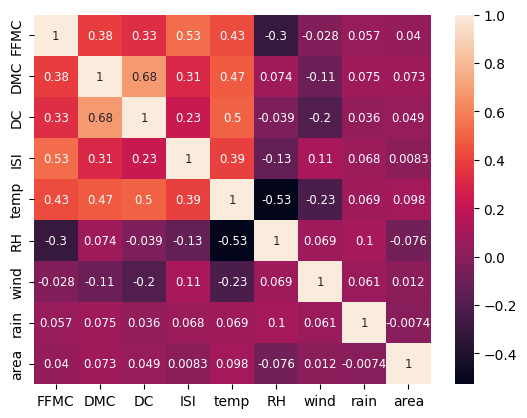

<Figure size 5000x5000 with 0 Axes>

In [ ]:
dfss=data.drop(['X', 'Y','day'], axis=1)
sn.heatmap(dfss.corr(method='pearson'),annot=True,annot_kws={'size': 8.5})
plt.figure(figsize=(50,50))
plt.show()

In [83]:
dfs=data
dfs

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Y/N
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0


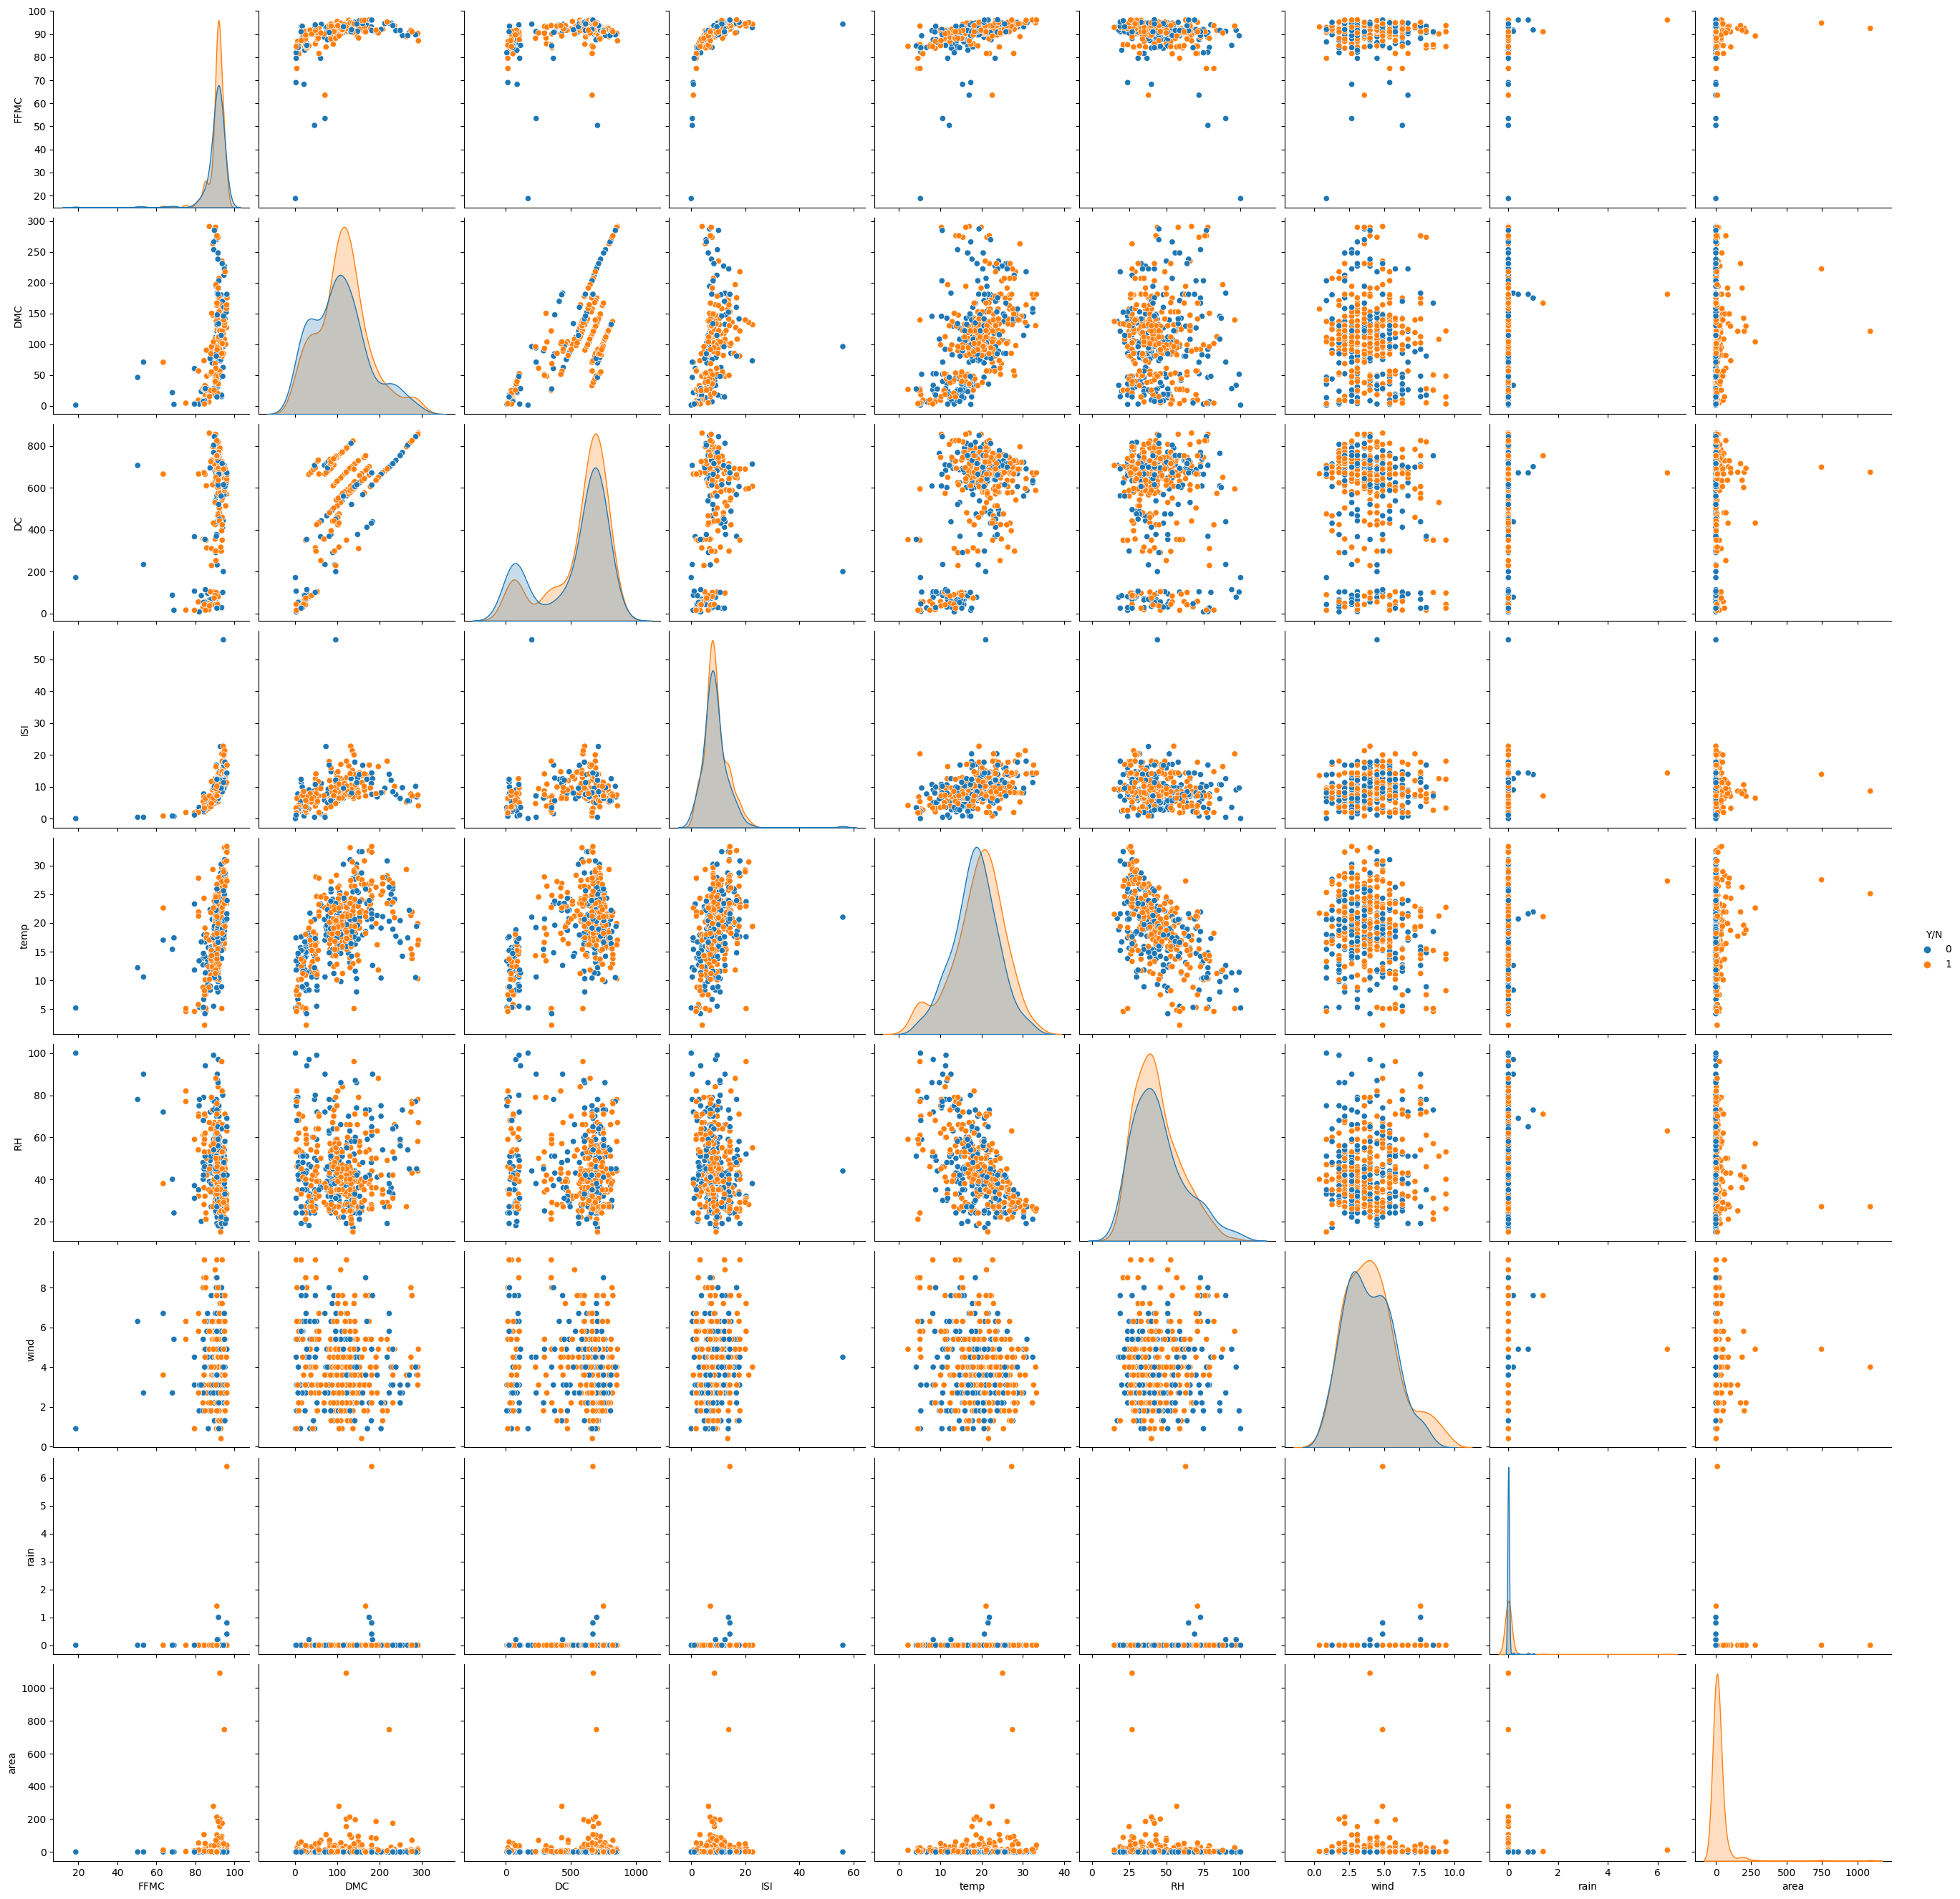

In [ ]:
sn.pairplot(dfs,hue='Y/N',height=3)

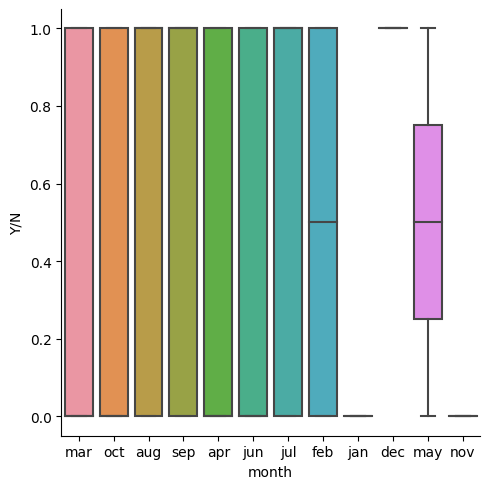

In [ ]:
sn.catplot(data=dfs, x="month", y="Y/N", kind="box")


In [ ]:
import random
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

1    270
0    247
Name: Y/N, dtype: int64

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f78217d4040>,
 'caps': [<matplotlib.lines.Line2D at 0x7f78217d4580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78217a3d60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f78217d4ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f78217d4d60>],
 'means': []}

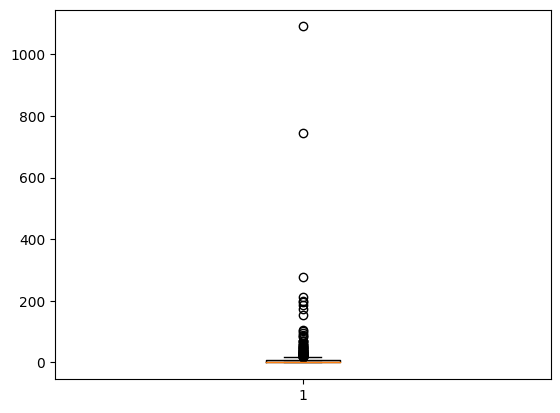

In [ ]:
print(dfs["area"].describe().T)
plt.boxplot(dfs["area"])

In [ ]:
print(dfs["area"].agg(["max","min","mean"]))

max     1090.840000
min        0.000000
mean      12.847292
Name: area, dtype: float64


(array([395., 119.,   2.,   0.,   1.]),
 array([ 0.  , 11.22, 22.44, 33.66, 44.88, 56.1 ]),
 <BarContainer object of 5 artists>)

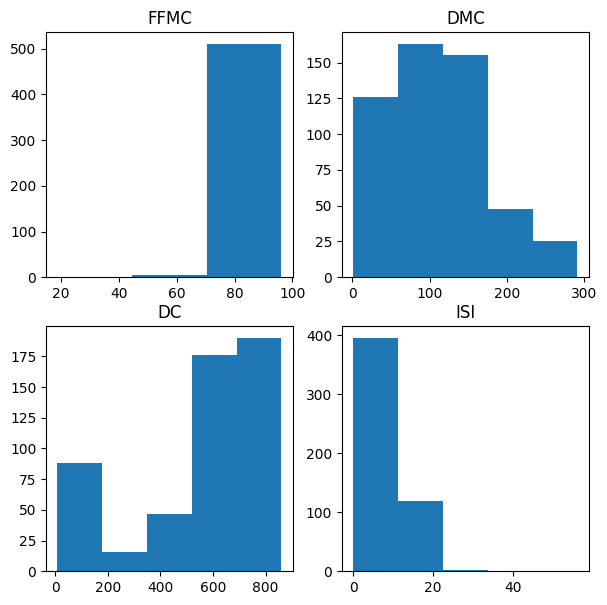

In [ ]:
fig,axes=plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(7)
axes[0,0].set_title("FFMC")
axes[0,0].hist(dfs["FFMC"],bins=3)
axes[0,1].set_title("DMC")
axes[0,1].hist(dfs["DMC"],bins=5)
axes[1,0].set_title("DC")
axes[1,0].hist(dfs["DC"],bins=5)
axes[1,1].set_title("ISI")
axes[1,1].hist(dfs["ISI"],bins=5)


<Axes: xlabel='ISI'>

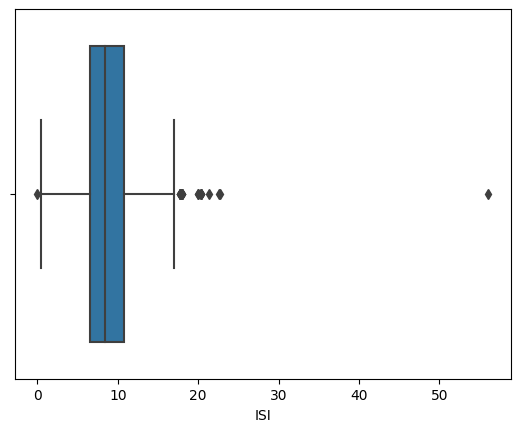

In [ ]:
sn.boxplot(x='ISI',data=data)

In which month maximum temperature was recorded ?

In which month maximum wind was recorded ?

In which month maximum rain was recorded ?

In which month maximum RH was recorded ?

Text(0, 0.5, 'rain in mm')

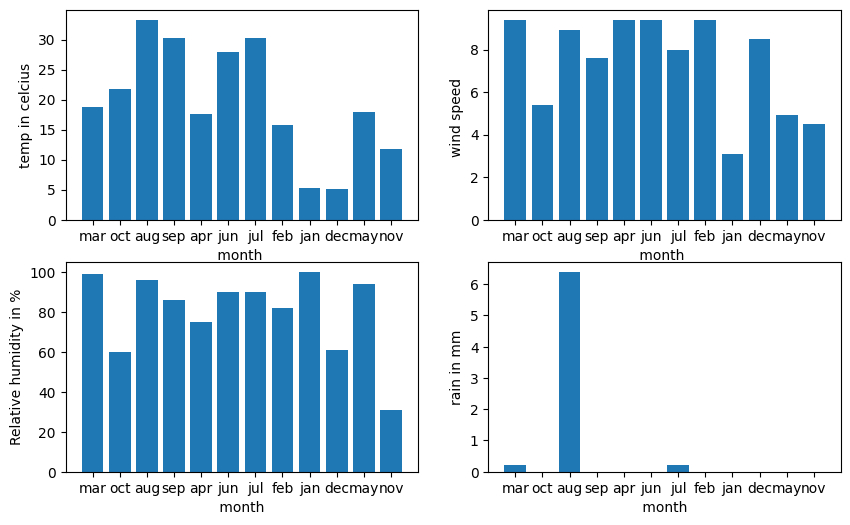

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.bar(x=dfs["month"],height=dfs["temp"])
plt.xlabel(" month  ")
plt.ylabel("temp in celcius")
plt.subplot(2,2,2)
plt.bar(x=dfs["month"],height=dfs["wind"])
plt.xlabel(" month  ")
plt.ylabel("wind speed ")
plt.subplot(2,2,3)
plt.bar(x=dfs["month"],height=dfs["RH"])
plt.xlabel(" month ")
plt.ylabel("Relative humidity in %")
plt.subplot(2,2,4)
plt.bar(x=dfs["month"],height=dfs["rain"])
plt.xlabel(" month ")
plt.ylabel("rain in mm")

Distribution of FFMC,DMC and DC values


Text(0, 0.5, 'DC')

<Figure size 1000x600 with 0 Axes>

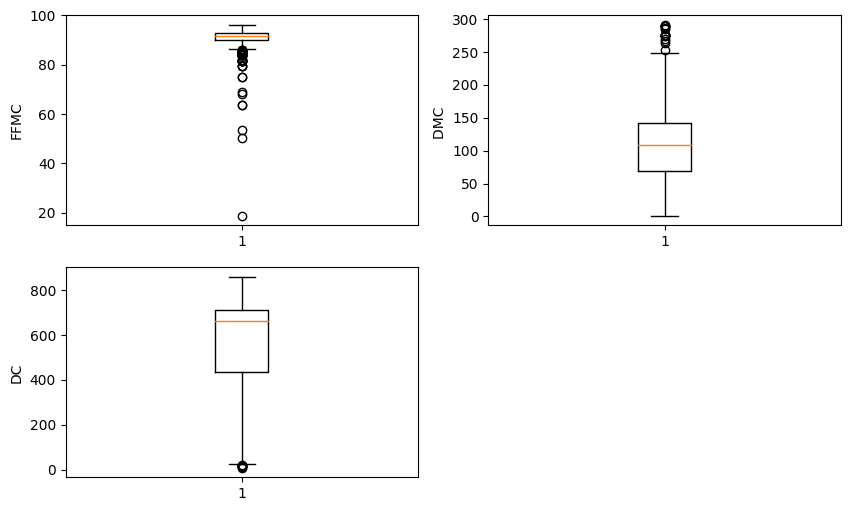

In [ ]:
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.boxplot(dfs["FFMC"])
plt.ylabel("FFMC")
plt.subplot(2,2,2)
plt.boxplot(dfs["DMC"])
plt.ylabel("DMC ")
plt.subplot(2,2,3)
plt.boxplot(dfs["DC"])
plt.ylabel("DC")


Transforming the burnt area with natural logarithm and comparing the plot with the untransformed plot.

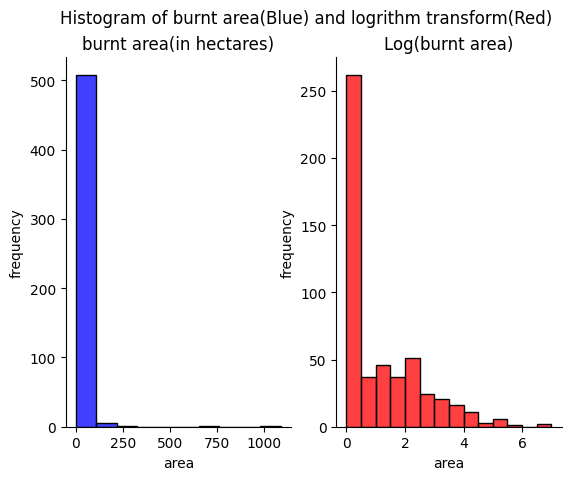

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Histogram of burnt area(Blue) and logrithm transform(Red)')
sn.despine()
sn.histplot(dfs.area, bins = 10, color ='b',ax = axes[0])
axes[0].set_title('burnt area(in hectares)')
axes[0].set_ylabel('frequency')
sn.histplot(np.log(dfs.area +1), color = 'r', ax = axes[1])
axes[1].set_title('Log(burnt area)')
axes[1].set_ylabel('frequency')
plt.show()

Plot showing the frequency of forest fires by month.

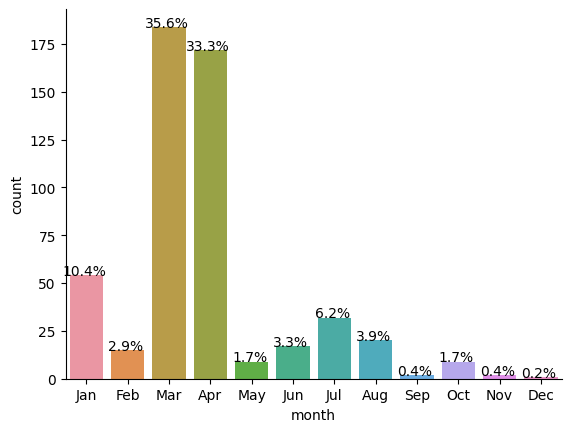

In [ ]:
ax = sn.countplot(x =dfs.month)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sn.despine()
total = float(len(dfs.month))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')


Plot showing the frequency of forest fires in days of the week.

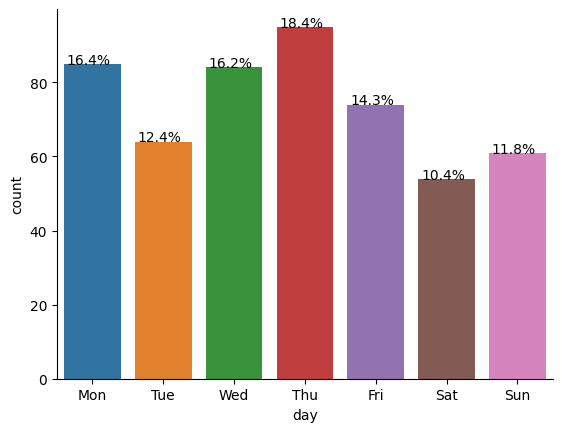

In [ ]:
ax = sn.countplot(x =data.day)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
sn.despine()
total = float(len(data.day))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

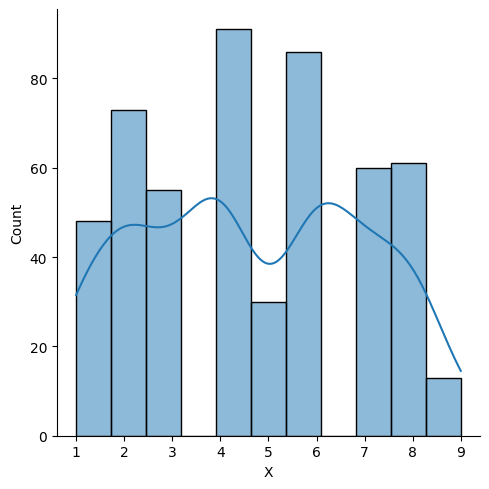

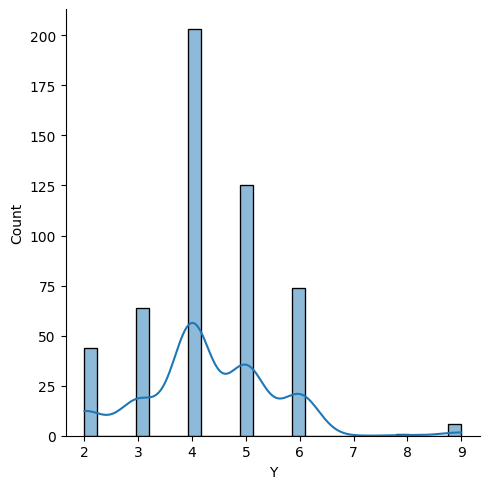

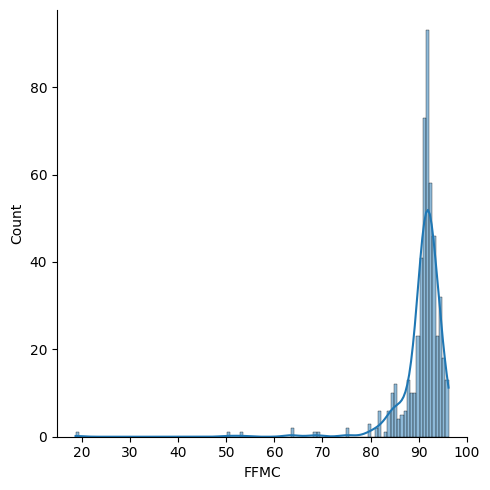

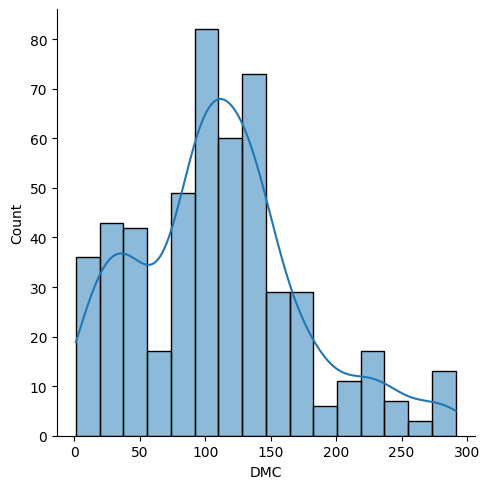

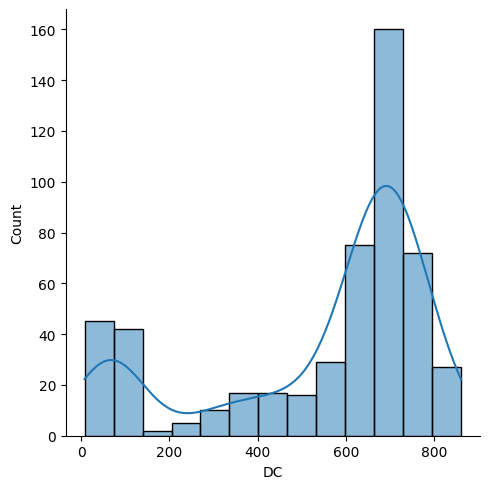

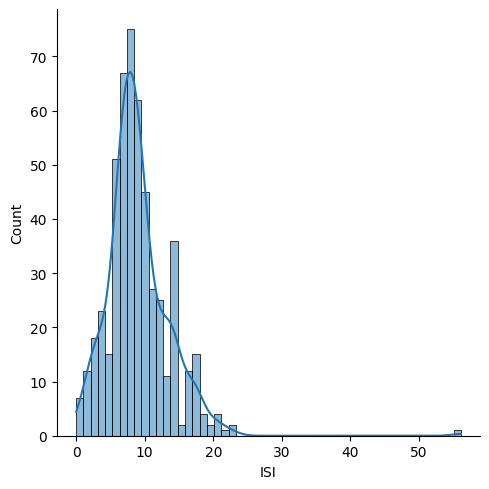

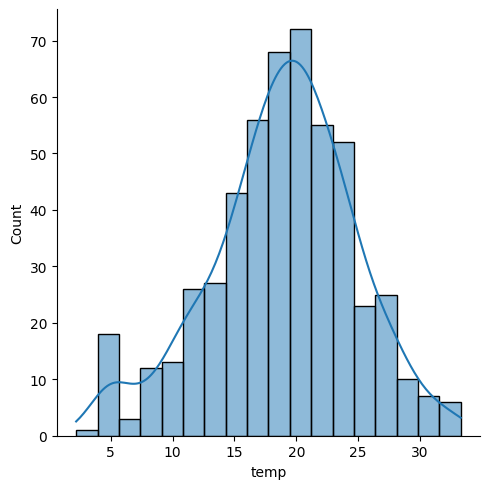

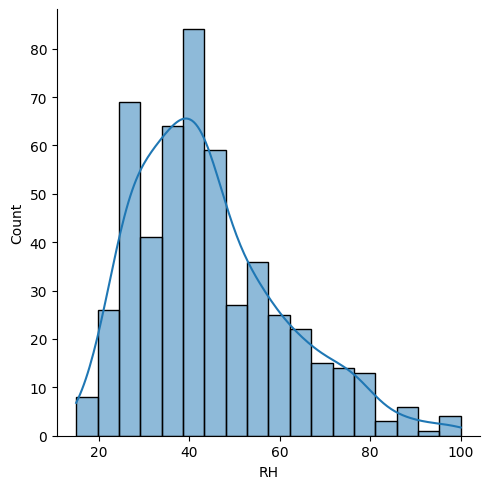

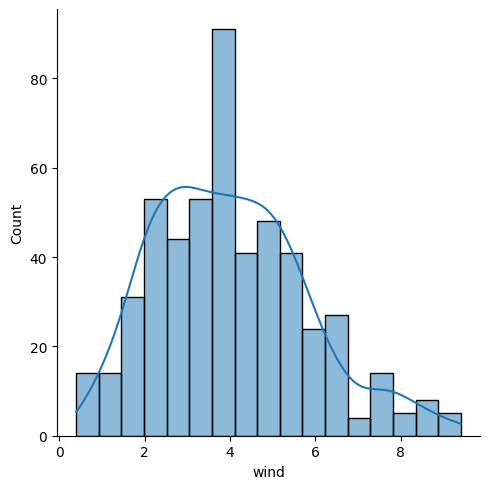

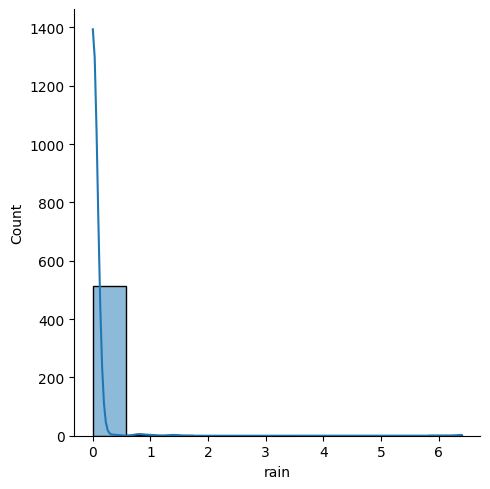

In [ ]:
for x in ['X', 'Y', 'FFMC','DMC', 'DC', 'ISI', 'temp','RH','wind','rain']:
          sn.displot(dfs[x], kde=True)


Plotting A circle When Fire Spreads

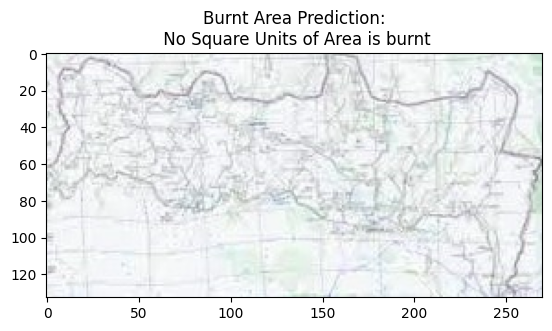

In [ ]:
image3 = cv2.imread('map_mntsn.jfif')
#cv2.circle(img=image3, center = (30,25), radius =0, color =(255,0,0), thickness=1)
#plt.set_title('matplotlib.axes.Axes.imshow() Examples')
plt.title("Burnt Area Prediction:\n No Square Units of Area is burnt")
plt.imshow(image3)

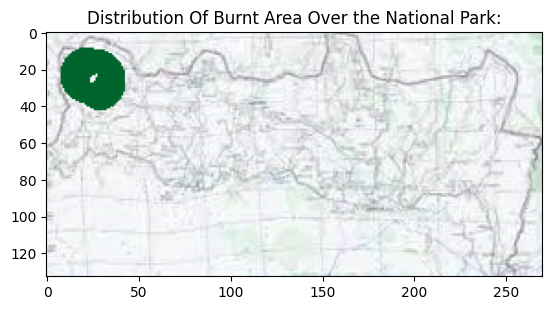

In [ ]:
dif = pd.DataFrame(data, columns=['X', 'Y', 
                                 'area'])
image3 = cv2.imread('map_mntsn.jfif')
for ind in dif.index:
  if(dif['area'][ind]!=0):
    cv2.circle(img=image3, center = (dif['X'][ind]+20,dif['Y'][ind]+20), radius =10, color =(0,100,45), thickness=5)

plt.title("Distribution Of Burnt Area Over the National Park:")
plt.imshow(image3)

In [ ]:
dif['area'][ind]

0.0

In [ ]:
smp=data["area"]
for i in range(140,150):
  print("Area:",smp[i],"Radius Is:",math.sqrt(smp[i]/math.pi))
  if(math.sqrt(smp[i]/math.pi)>0 and math.sqrt(smp[i]/math.pi)<=1):
    cv2.circle(img=image3, center = (201,349), radius =1, color =(255,0,0), thickness=10)
    st=str(i)+".png"
    plt.savefig(st)
    #plt.imshow(image3)
    #time.sleep(2)
  elif(math.sqrt(smp[i]/math.pi)>1):
    cv2.circle(img=image3, center = (201,349), radius =int(math.sqrt(smp[i]/math.pi)), color =(255,0,0), thickness=10)
    #plt.imshow(image3)

Area: 0.47 Radius Is: 0.3867888913947525
Area: 0.55 Radius Is: 0.41841419359420023
Area: 0.61 Radius Is: 0.4406461512053774
Area: 0.71 Radius Is: 0.47539459314393906
Area: 0.77 Radius Is: 0.4950743503369154
Area: 0.9 Radius Is: 0.5352372348458313
Area: 0.95 Radius Is: 0.5499039842323395
Area: 0.96 Radius Is: 0.5527906391541367
Area: 1.07 Radius Is: 0.5836022431559496
Area: 1.12 Radius Is: 0.5970821321441847


<Figure size 640x480 with 0 Axes>

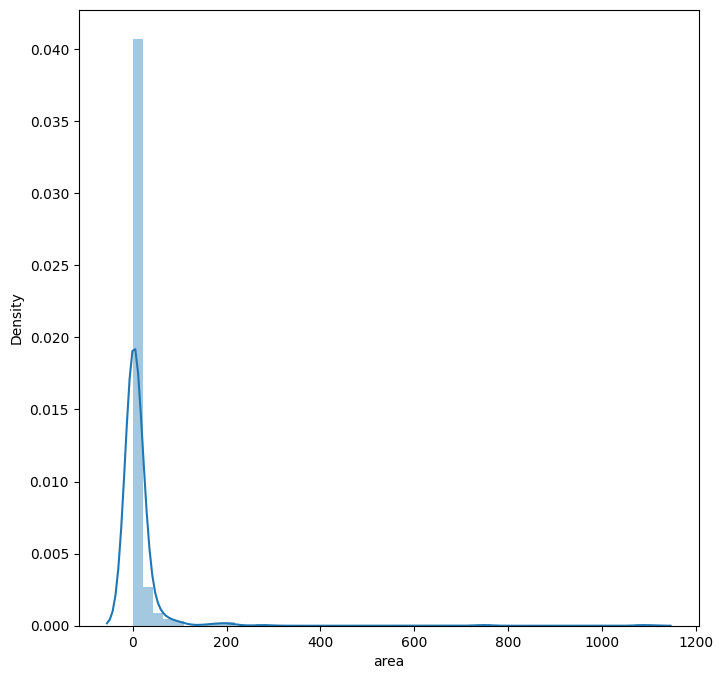

In [ ]:
# Skewness of the Area in the dataset
plt.rcParams['figure.figsize'] = [8, 8]
sn.distplot(data['area']);

In [ ]:
# Reducing the Right Skewness of the Area using log(n) + 1
data['u_area'] = np.log(data['area'] + 1)


Month Vs Temperature Barplot

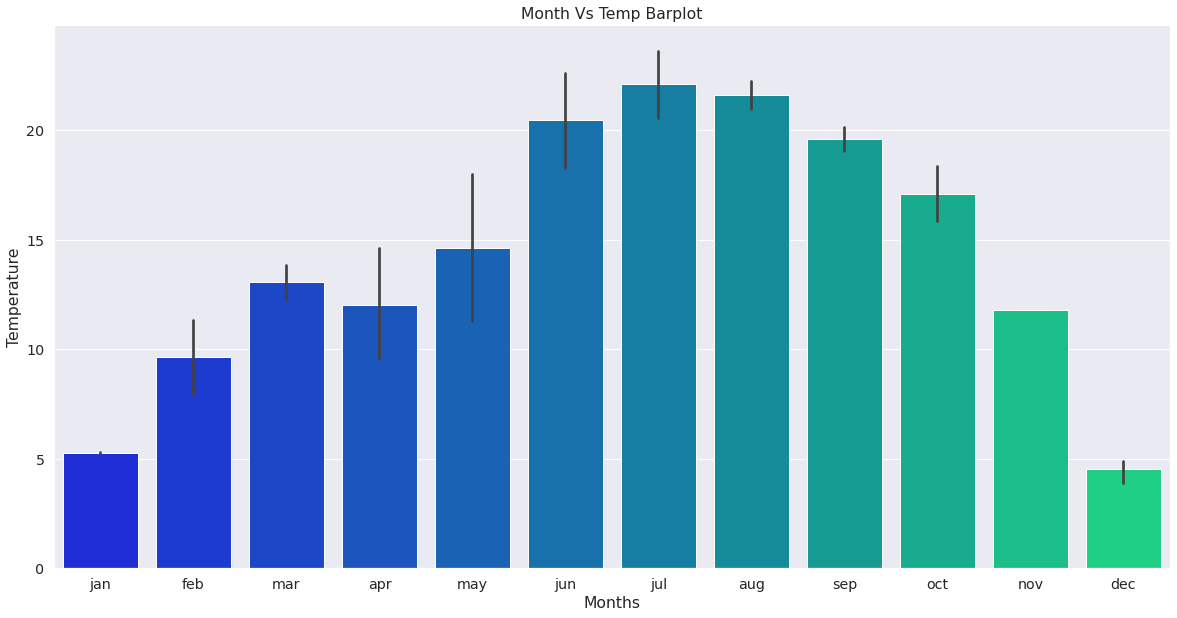

In [ ]:
# setting parameters
plt.rcParams['figure.figsize'] = [20, 10]
sn.set(style = "darkgrid", font_scale = 1.3)
month_temp = sn.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

In [ ]:
data.day.unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

Countplot for the days in the week

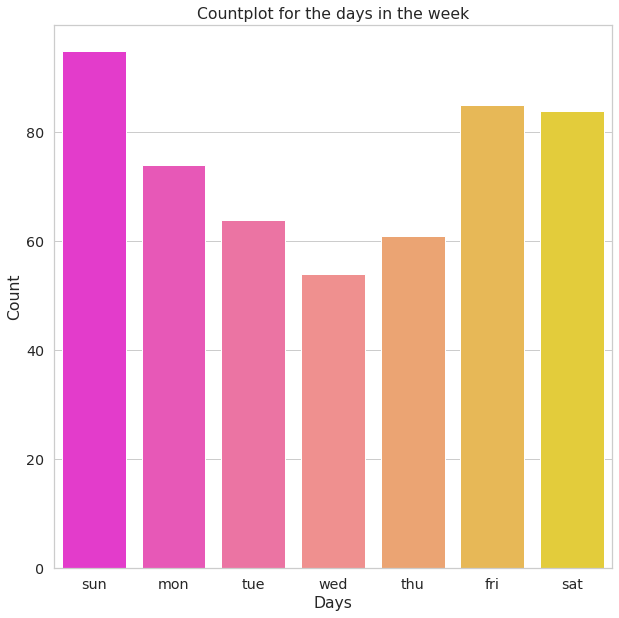

In [ ]:
plt.rcParams['figure.figsize'] = [10, 10]
sn.set(style = 'whitegrid', font_scale = 1.3)
day = sn.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the days in the week', xlabel = 'Days', ylabel = 'Count');

Scatter Plot between Area and Temperature

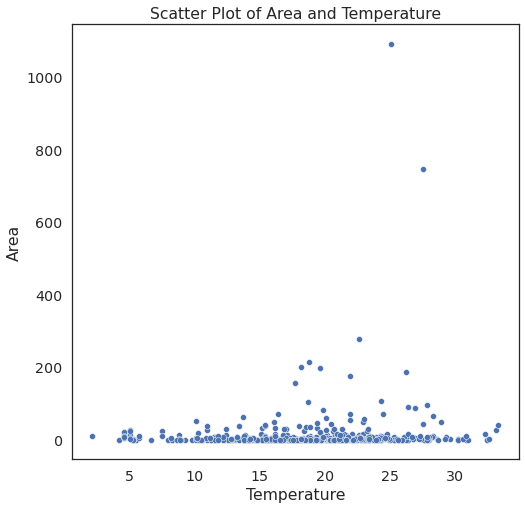

In [ ]:
plt.rcParams['figure.figsize'] = [8, 8]
sn.set(style = "white", font_scale = 1.3)
scat = sn.scatterplot(data['temp'], data['area'])
scat.set(title = "Scatter Plot of Area and Temperature", xlabel = "Temperature", ylabel = "Area");

Skewed and Unskewed Area Distribution

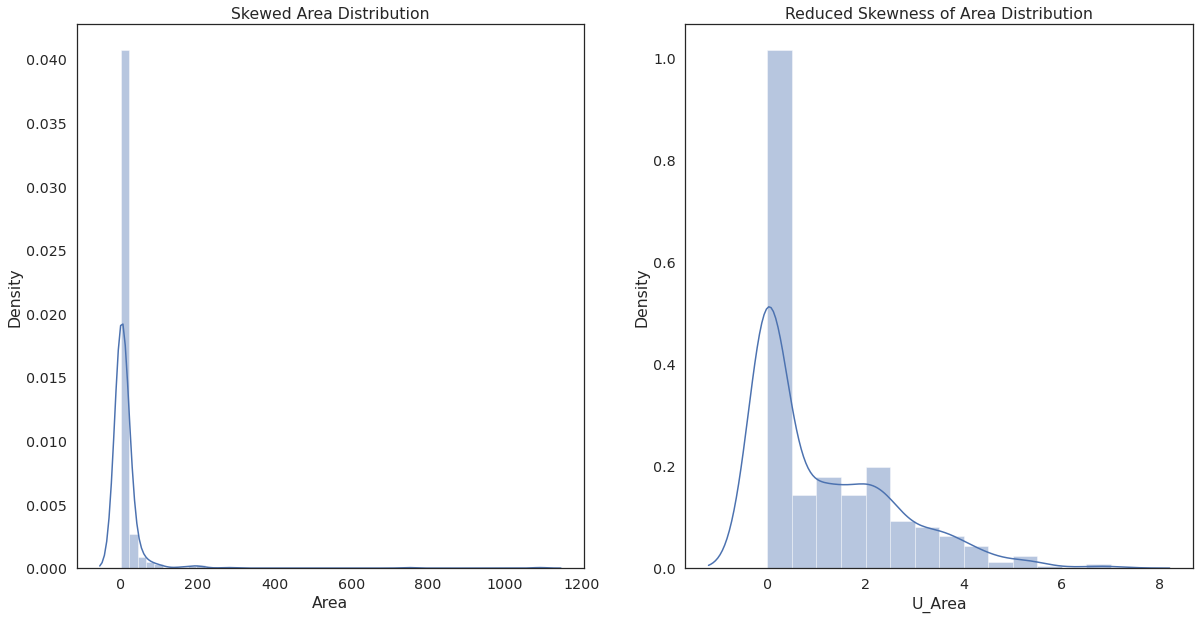

In [ ]:
# Setting Parameters
plt.rcParams['figure.figsize'] = [20, 10]
sn.set(style = 'white', font_scale = 1.3)
fig, ax = plt.subplots(1,2)

# Distribution Plots
area_dist = sn.distplot(data['area'], ax = ax[0]);
area_dist_2 = sn.distplot(data['u_area'], ax = ax[1]);
area_dist.set(title = "Skewed Area Distribution", xlabel = "Area", ylabel = "Density")
area_dist_2.set(title = "Reduced Skewness of Area Distribution", xlabel = "U_Area", ylabel = "Density");

In [ ]:
Data = norm.rvs(data['area'])
Data

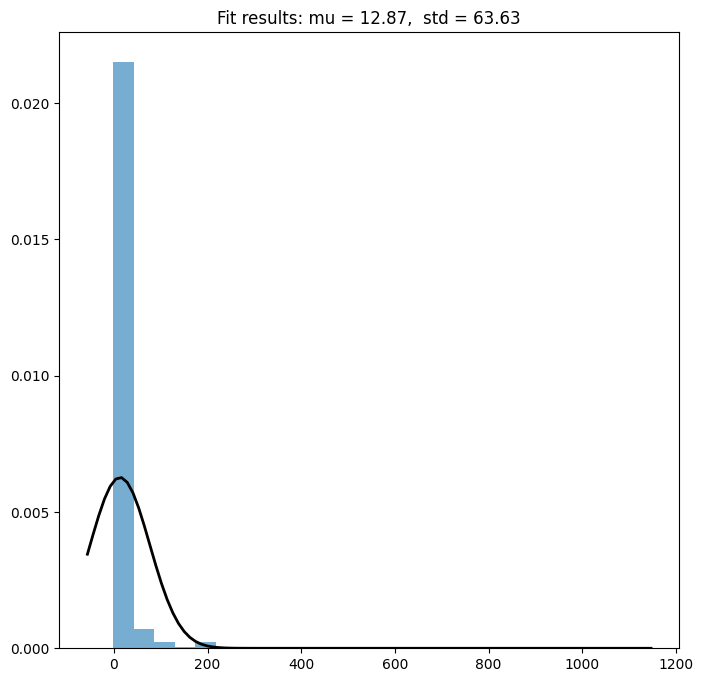

In [ ]:
Data = norm.rvs(data['area'])

# Fit a normal distribution to the data
mu, std = norm.fit(Data)

plt.hist(Data, bins=25, density=True, alpha=0.6)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Preprocessing

In [ ]:
data['area'] = np.log(data['area'] + 1)
data.drop(columns = 'u_area', inplace = True)
display(data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Y/N
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.000000,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.000000,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.000000,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.000000,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,2.006871,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,4.012592,1
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,2.498152,1
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.000000,0


In [ ]:
# Normalization of the features
minmax = MinMaxScaler()

# FFMC, DMC, DC, ISI, RH
data['FFMC'] = minmax.fit_transform(np.array(data['FFMC']).reshape(-1, 1))
data['DMC'] = minmax.fit_transform(np.array(data['DMC']).reshape(-1, 1))
data['DC'] = minmax.fit_transform(np.array(data['DC']).reshape(-1, 1))
data['ISI'] = minmax.fit_transform(np.array(data['ISI']).reshape(-1, 1))
data['RH'] = minmax.fit_transform(np.array(data['RH']).reshape(-1, 1))


In [84]:
# Changing categorical values into numerical values

# Months
data['month'].replace({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,
                           'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12},
                           inplace = True)

# Days
data['day'].replace({'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6, 'sat' : 7}, inplace = True)

# # Using Label Encoder for cat to num conversion
# categorical = list(df_forest.select_dtypes(include = ["object"]).columns)
# for i, column in enumerate(categorical) :
#     label = LabelEncoder()
#     df_forest[column] = label.fit_transform(df_forest[column])

data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Y/N
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0
5,8,6,8,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0
6,8,6,8,2,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0
7,8,6,8,2,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0
8,8,6,9,3,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0
9,7,5,9,7,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0


Splitting the dataset into training and testing

In [85]:
target = data['area']
features = data.drop(columns = 'area')

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.15, random_state = 196)

print ("Train data set size : ", X_train.shape)
print ("Test data set size : ", X_test.shape)

Train data set size :  (439, 13)
Test data set size :  (78, 13)


Machine Learning Models

Linear Regression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))
#print("Predictions:",predictions)
#print(regr.score(X_test, y_test))

Mean Squared Error :  0.6027869015791949
r2 Score :  0.6387314516836997
Predictions: [ 0.11366332  2.23433206  2.03847963  0.04863855  2.22460676  2.09992337
 -0.19548165  0.0364367   1.89730928  1.90008729  2.19832631 -0.06400641
 -0.04054962  2.09410009  0.01319348  2.28081342  2.11060022 -0.32160282
  2.09885926  0.0166595   2.00403752  1.94696862  2.11784974 -0.06796246
 -0.11250531  2.16714106  2.17350928  0.02629647  2.29373033  2.09338662
 -0.20443042 -0.00709071 -0.26060836  2.01635425  2.25147639  1.96593405
  2.21297567 -0.0311916   2.29224706 -0.11972462 -0.10390373  2.13645676
  2.16840784  0.04682247 -0.06643092 -0.04174482 -0.01603552  0.13692637
 -0.25216952 -0.12142815  2.14497055 -0.18481535  2.04612626  0.01145147
  1.94520968  0.02633292  2.15360106  1.9992535  -0.73436758  1.91475886
  2.24866935 -0.19105073  2.02558259 -0.01481236  0.00961284  2.27115953
  0.02159634  2.18358299  2.08552061  0.22690832  1.86370577  0.08755095
  0.05709108  1.95473405  2.35502967  2

Polynomial Regression

In [ ]:
# Transforming data
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)

# Predictions
predictions_poly = model_2.predict(poly_X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))
print ("r2 Score : ", r2_score(y_test, predictions_poly))


Mean Squared Error :  91.70115812540669
r2 Score :  -53.95929687273849


Lasso Regression

In [ ]:
model_3 = Lasso(alpha = 100, max_iter = 10000) 
model_3.fit(X_train, y_train)

# Predictions
prediction = model_3.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


Ridge Regression

In [ ]:
model_4 = Ridge(alpha = 500)
model_4.fit(X_train, y_train)

# Predictions
pred = model_4.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred))
print ("r2 Score : ", r2_score(y_test, pred))

Mean Squared Error :  1.3436254886788654
r2 Score :  0.19472432379650928


ElasticNet

In [ ]:
model_5 = ElasticNet(alpha = 100, max_iter = 10000)
model_5.fit(X_train, y_train)

# Predictions
pred1 = model_5.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred1))
print ("r2 Score : ", r2_score(y_test, pred1))


Mean Squared Error :  1.6692539081387816
r2 Score :  -0.0004347051747921604


SVR

In [ ]:
# SVR
model_6 = SVR(C = 100, kernel = 'linear')
model_6.fit(X_train, y_train)

# Predictions
prediction = model_6.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  0.5982114164869441
r2 Score :  0.6414736792483496


In [ ]:
prediction = np.exp(pred - 1)
print(prediction)
c=0
prediction
for i in y_test:
  print(i," ",prediction[c])
  c+=1

In [86]:
used_features = [
	"X",
    "Y",
    "month",
    "day","FFMC","DMC","DC","ISI","temp","RH","wind","rain"
	]
features = data[used_features]
target = data["area"]

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg = ExtraTreesRegressor(n_estimators=100)
rfe = RFE(reg)
fit = rfe.fit(feature_train,target_train)

print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

6
[False  True False False False  True False  True  True  True  True False]
[3 1 6 2 4 1 5 1 1 1 1 7]


In [ ]:
used_features = ["DMC","temp","RH","wind"]
features = data[used_features]
target = data["area"]

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)

reg = ExtraTreesRegressor(n_estimators=100)
reg.fit(feature_train,target_train)
reg.score(feature_test,target_test)

-0.020131133506350762

In [ ]:
print("Correlation:\n", data.corr(method='pearson').to_string())

Correlation:
               X         Y     month       day      FFMC       DMC        DC       ISI      temp        RH      wind      rain      area       Y/N
X      1.000000  0.539548 -0.065003  0.013037 -0.021039 -0.048384 -0.085916  0.006210 -0.051258  0.085223  0.018798  0.065387  0.063385  0.062491
Y      0.539548  1.000000 -0.066292 -0.013085 -0.046308  0.007782 -0.101178 -0.024488 -0.024103  0.062221 -0.020341  0.033234  0.044873  0.056892
month -0.065003 -0.066292  1.000000 -0.037469  0.291477  0.466645  0.868698  0.186597  0.368842 -0.095280 -0.086368  0.013438  0.056496  0.130329
day    0.013037 -0.013085 -0.037469  1.000000  0.073597  0.028697  0.001913  0.035926  0.032233 -0.083318 -0.004013 -0.024119  0.048359 -0.008477
FFMC  -0.021039 -0.046308  0.291477  0.073597  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485  0.056702  0.040122  0.073823
DMC   -0.048384  0.007782  0.466645  0.028697  0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.1

Feature Selection

In [87]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [88]:
dataset = data.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.55546923e-01, 1.06202037e-01, 8.41191991e-02, 7.70936914e-02,
       5.61902348e-02, 1.75180802e-02, 1.82986401e-03, 8.91749496e-04,
       3.12686389e-04, 1.57321715e-04, 1.01894635e-04, 3.63178635e-05])

In [ ]:
X

array([[ 7. ,  5. ,  3. , ..., 51. ,  6.7,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  0.9,  0. ],
       [ 7. ,  4. , 10. , ..., 33. ,  1.3,  0. ],
       ...,
       [ 7. ,  4. ,  8. , ..., 70. ,  6.7,  0. ],
       [ 1. ,  4. ,  8. , ..., 42. ,  4. ,  0. ],
       [ 6. ,  3. , 11. , ..., 31. ,  4.5,  0. ]])

In [ ]:
Y

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB


In [ ]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  4
Selected Features:  [False False False False False  True False False  True  True  True False]
Feature Ranking:  [6 4 8 3 2 1 5 7 1 1 1 9]


DC,WIND,RH,TEMP ARE THE 4 SELECTED FEATURES

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

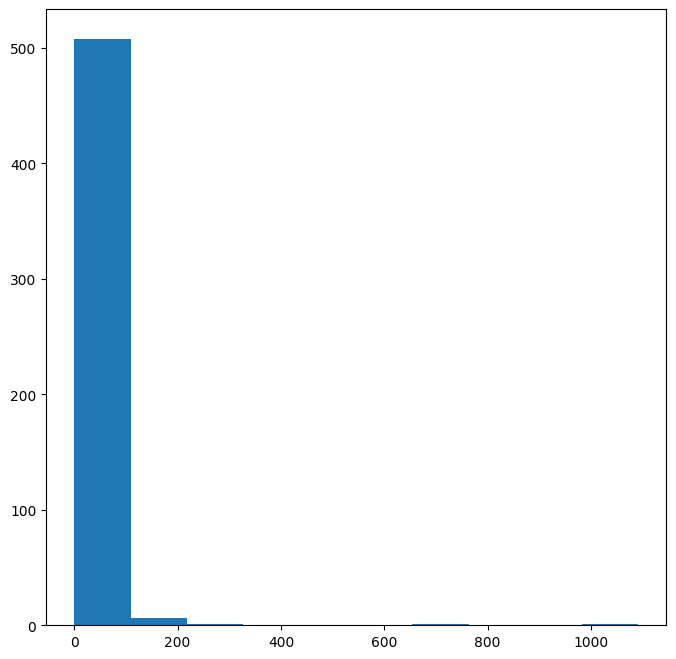

In [ ]:
plt.hist((data.area))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8785e001c0>,
      dtype=object)

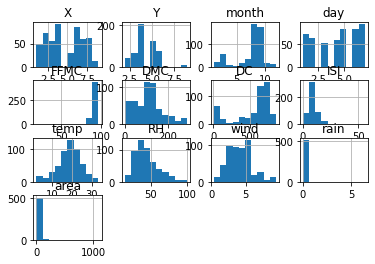

In [ ]:
data.hist()

Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8786087640>,
      dtype=object)

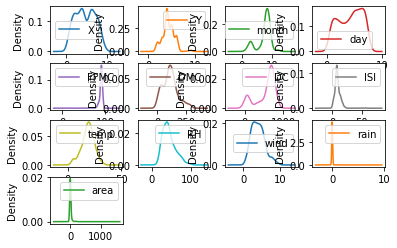

In [ ]:
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

X            AxesSubplot(0.125,0.71587;0.168478x0.16413)
Y         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
month     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
day       AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FFMC        AxesSubplot(0.125,0.518913;0.168478x0.16413)
DMC      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
DC       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
ISI      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
temp        AxesSubplot(0.125,0.321957;0.168478x0.16413)
RH       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
wind     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
rain     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
area           AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

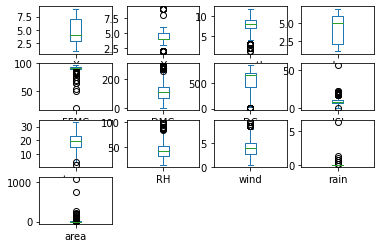

In [ ]:
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

[Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'month'),
 Text(0, 0, 'day'),
 Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'area')]

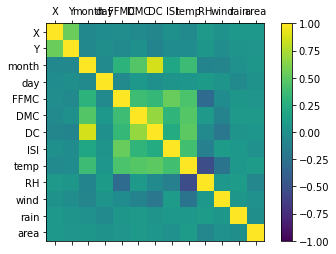

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

In [89]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    mse=mean_squared_error(predictions,Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f  %f (%f)" % (name, score,mse, mae)
    print(msg)

LiR: 0.025351  3941.701745 (19.535819)
Ridge: 0.025351  3941.702229 (19.533187)
Lasso: 0.024613  3944.685479 (19.185511)
ElasticNet: 0.024455  3945.325480 (19.181896)
Bag_Re: 0.772814  918.831352 (8.054391)
RandomForest: 0.811852  761.997087 (8.291952)
ExtraTreesRegressor: 0.999897  0.416323 (0.096441)
KNN: 0.273255  2939.729814 (15.541547)
CART: 0.999897  0.416323 (0.096441)
SVM: 0.000503  4190.379134 (12.808838)


'ExtraTreesRegressor' and 'CART' are the best estimators/models for this dataset, followed by 'BaggingRegressor', they can be further explored and their hyperparameters tuned

In [ ]:
X[238]

array([  6. ,   5. ,   9. ,   6. ,  92.5, 121.1, 674.4,   8.6,  25.1,
        27. ,   4. ,   0. ])

In [107]:
#burnt area is zero
inptt=X[0]
x_coor=inptt[0]+20
y_coor=inptt[1]+20
inptt=inptt.reshape(1,-1)

In [102]:
model=DecisionTreeRegressor()
model.fit(X, Y)
predictions = model.predict(X)

In [91]:
#Burnt area is not zero
inpt=np.array([  6. ,   5. ,   9. ,   6. ,  92.5, 121.1, 674.4,   8.6,  25.1,
        27. ,   4. ,   0. ])
x_coor=inpt[0]+20
y_coor=inpt[1]+20
inpt=inpt.reshape(1,-1)

In [110]:
pred_value=model.predict(inpt)
pred_value

array([1090.84])

In [104]:
def plot_area_eqz(nm,a,b):
  image3 = cv2.imread('map_mntsn.jfif')
  #cv2.circle(img=image3, center = (int(a),int(b)), radius =0, color =(255,0,0), thickness=1)
  #plt.set_title('matplotlib.axes.Axes.imshow() Examples')
  plt.title("Burnt Area Prediction:\n No Square Units of Area is burnt")
  plt.imshow(image3)

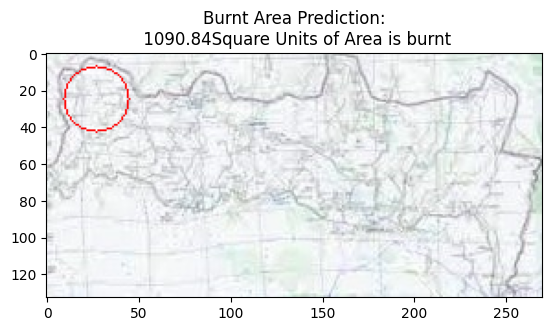

In [111]:
area_burnt=pred_value[0].round(2)

#print(x_coor,y_coor)
if area_burnt>0:
  
  plot_area_grz(area_burnt,x_coor,y_coor)
else:
  plot_area_eqz(area_burnt,x_coor,y_coor)

In [106]:
def plot_area_grz(nm,a,b):
  image3 = cv2.imread('map_mntsn.jfif')
  cv2.circle(img=image3, center = (int(a),int(b)), radius =int(math.sqrt(nm/math.pi)), color =(255,0,0), thickness=1)
  #plt.set_title('matplotlib.axes.Axes.imshow() Examples')
  plt.title("Burnt Area Prediction:\n "+ str(nm) +"Square Units of Area is burnt")
  plt.imshow(image3)

In [93]:
inpt=np.array([ 6. ,  5. ,  9. ,  6. , 92.5, 121.1, 674.4,  8.6,  25.1, 27. ,  4.,
        0. ])
inpt=inpt.reshape(1,-1)

In [ ]:
Y = np.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [ ]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)
kfold = KFold(n_splits=30, random_state=seed,shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.02 (0.03) MSE
